In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()
%load_ext autoreload 
%autoreload 2

In [2]:
model_type = 'gpt2'
learning_rate = 3e-5

### Folds on different splits

In [4]:
# random splits
random_results = {'train_kl_loss':[], 'test_kl_loss':[], 'perplexity':[]}
for fold in range(5): 
    random_split_path = f"../results/fine_tuning_results_paper/all_folds/{model_type}_{learning_rate}_split=random_EBr=True_fold={fold}_metrics.p"
    random_split_metrics = pickle.load(open(random_split_path, 'rb'))
    random_split_metrics['perplexity'] = [val.cpu() for val in random_split_metrics['perplexity']]
    for key in random_results.keys():
        random_results[key].append(random_split_metrics[key])
for key in random_results.keys():
    random_results[key] = np.array(random_results[key])

# pronoun split
pronoun_results = {'train_kl_loss':[], 'test_kl_loss':[], 'perplexity':[]}
for fold in range(5): 
    pronoun_split_path = f"../results/fine_tuning_results_paper/all_folds/{model_type}_{learning_rate}_split=pronouns_EBr=True_fold={fold}_metrics.p"
    pronoun_split_metrics = pickle.load(open(pronoun_split_path, 'rb'))
    pronoun_split_metrics['perplexity'] = [val.cpu() for val in pronoun_split_metrics['perplexity']]
    for key in pronoun_results.keys():
        pronoun_results[key].append(pronoun_split_metrics[key])
for key in pronoun_results.keys():
    pronoun_results[key] = np.array(pronoun_results[key])
  
# verb split  
verb_results = {'train_kl_loss':[], 'test_kl_loss':[], 'perplexity':[]}
for fold in range(5): 
    verb_split_path = f"../results/fine_tuning_results_paper/all_folds/{model_type}_{learning_rate}_split=verbs_EBr=True_fold={fold}_metrics.p"
    verb_split_metrics = pickle.load(open(verb_split_path, 'rb'))
    verb_split_metrics['perplexity'] = [val.cpu() for val in verb_split_metrics['perplexity']]
    for key in pronoun_results.keys():
        verb_results[key].append(verb_split_metrics[key])
for key in verb_results.keys():
    verb_results[key] = np.array(verb_results[key])

/opt/conda/envs/renate_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[24.671692 25.011393 25.394413 25.625223 25.79777  25.887579]
[24.671692 24.982899 25.362093 25.59824  25.770737 25.858776]
[24.671692 25.018764 25.404665 25.64912  25.828735 25.915833]


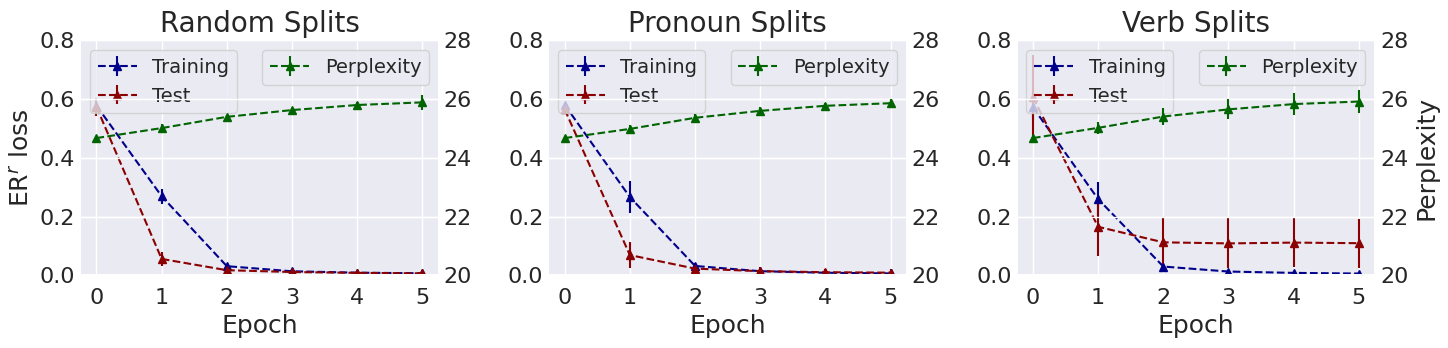

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

plt.rcParams.update({'font.size': 24})
plt.rc('axes', titlesize=20, labelsize=18)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

splits = ['Random Splits', 'Pronoun Splits', 'Verb Splits']
all_results = [random_results, pronoun_results, verb_results]

for i in range(3):
    ax[i].set_title(splits[i])
    results = all_results[i]
    ax[0].set_ylabel('ER$^r$ loss', fontsize=18)
    
    train_mean = results['train_kl_loss'].mean(axis=0)
    train_min = results['train_kl_loss'].min(axis=0)
    train_max = results['train_kl_loss'].max(axis=0)
    ax[i].errorbar(range(6), train_mean, yerr= train_max - train_min, label='Training', linestyle='dashed', c='darkblue', fmt='^')
    
    test_mean = results['test_kl_loss'].mean(axis=0)
    test_min = results['test_kl_loss'].min(axis=0)
    test_max = results['test_kl_loss'].max(axis=0)
    ax[i].errorbar(range(6), test_mean, yerr= test_max - test_min, label='Test', linestyle='dashed',  c='darkred', fmt='^')
    ax[i].set_ylim([0, 0.8])
    ax[i].set_xticks(list(range(6)))
    ax[i].tick_params(axis=u'y', which=u'both',length=0)
    ax[i].legend(loc=2, fontsize=14)


    ax_twin = ax[i].twinx() 
    perplexity_mean = results['perplexity'].mean(axis=0) #(results['perplexity'].mean(axis=0) - 20) / 10
    print(perplexity_mean)
    perplexity_min = results['perplexity'].min(axis=0) #(results['perplexity'].min(axis=0) - 20) / 10
    perplexity_max = results['perplexity'].max(axis=0) # (results['perplexity'].max(axis=0) -20) / 10
    ax_twin.errorbar(range(6), perplexity_mean, yerr= perplexity_max - perplexity_min, label='Perplexity', linestyle='dashed',  c='darkgreen', fmt='^')
    ax_twin.set_ylim([20, 28])
    ax_twin.tick_params(axis=u'y', which=u'both',length=0)
    ax_twin.legend(loc=1, fontsize=14)
    if i == 2:
        ax_twin.set_ylabel('Perplexity', fontsize=18)
    ax[i].set_xlabel("Epoch")
    
plt.tight_layout()
plt.savefig('images/exp4/finetuning.pdf',  bbox_inches='tight', pad_inches=0.)

    